# 按照单品分组

In [36]:
import pandas as pd
df = pd.read_excel('/Users/allenygy/Desktop/WorkSpace/VScode-Workspace/CODE/Python/国赛/问题一/Result1.xlsx')
print(df)

            销售日期        单品名称  销量(千克)             年-月-单品        年-月-品类    年份  \
0     2020-07-01      七彩椒(1)   1.909      2020-7-七彩椒(1)    2020-7-辣椒类  2020   
1     2020-07-01         上海青   0.000         2020-7-上海青    2020-7-花叶类  2020   
2     2020-07-01       云南油麦菜   0.000       2020-7-云南油麦菜    2020-7-花叶类  2020   
3     2020-07-01        云南生菜   0.000        2020-7-云南生菜    2020-7-花叶类  2020   
4     2020-07-01        外地茼蒿   2.623        2020-7-外地茼蒿    2020-7-花叶类  2020   
...          ...         ...     ...                ...           ...   ...   
46594 2023-06-30      金针菇(盒)   0.000      2023-6-金针菇(盒)    2023-6-食用菌  2023   
46595 2023-06-30         长线茄   0.000         2023-6-长线茄     2023-6-茄类  2023   
46596 2023-06-30  青红杭椒组合装(份)   0.000  2023-6-青红杭椒组合装(份)    2023-6-辣椒类  2023   
46597 2023-06-30       高瓜(1)   0.000       2023-6-高瓜(1)  2023-6-水生根茎类  2023   
46598 2023-06-30       高瓜(2)   0.000       2023-6-高瓜(2)  2023-6-水生根茎类  2023   

       月份   品类名称  
0       7    辣椒类  
1       7    

In [33]:
Single_item = df.groupby(['年-月-单品'])['销量(千克)'].sum().reset_index()
Single_item[['年份', '月份', '单品名称']] = Single_item['年-月-单品'].str.split('-', expand=True)
Single_item['日期'] = pd.to_datetime(Single_item['年份'].astype(str) + '-' + Single_item['月份'].astype(str) + '-01')
# 按日期升序排序    
Single_item = Single_item.sort_values(by='日期', ascending=True)
print(Single_item)
Single_item.to_excel('Single_item.xlsx', index=False)

KeyError: '年-月-单品'

# 聚类

In [21]:
import pandas as pd
df = pd.read_excel('/Users/allenygy/Desktop/WorkSpace/VScode-Workspace/CODE/Python/国赛/问题一/聚类分析_Single_item .xlsx')
df.head()

,聚类种类,年-月-单品,销量(千克),年份,月份,单品名称,日期
0,类别1,2020-7-外地茼蒿,26.751,2020.0,7.0,外地茼蒿,2020-07-01
1,类别1,2020-7-红尖椒,0.000,2020.0,7.0,红尖椒,2020-07-01
2,类别1,2020-7-红杭椒,0.000,2020.0,7.0,红杭椒,2020-07-01
3,类别1,2020-7-红椒(1),0.000,2020.0,7.0,红椒(1),2020-07-01
4,类别1,2020-7-红灯笼椒(1),39.676,2020.0,7.0,红灯笼椒(1),2020-07-01


In [26]:
# 将销售日期和单品名称作为分类依据，并计算销售总量
cluster = df.groupby(['日期','聚类种类'])['销量(千克)'].sum().reset_index()
cluster = cluster.sort_values(by='日期', ascending=True)

cluster.head()


,日期,聚类种类,销量(千克)
0,2020-07-01,类别1,317.126
1,2020-07-01,类别3,298.286
2,2020-08-01,类别1,591.407
3,2020-08-01,类别3,294.539
4,2020-09-01,类别1,396.790


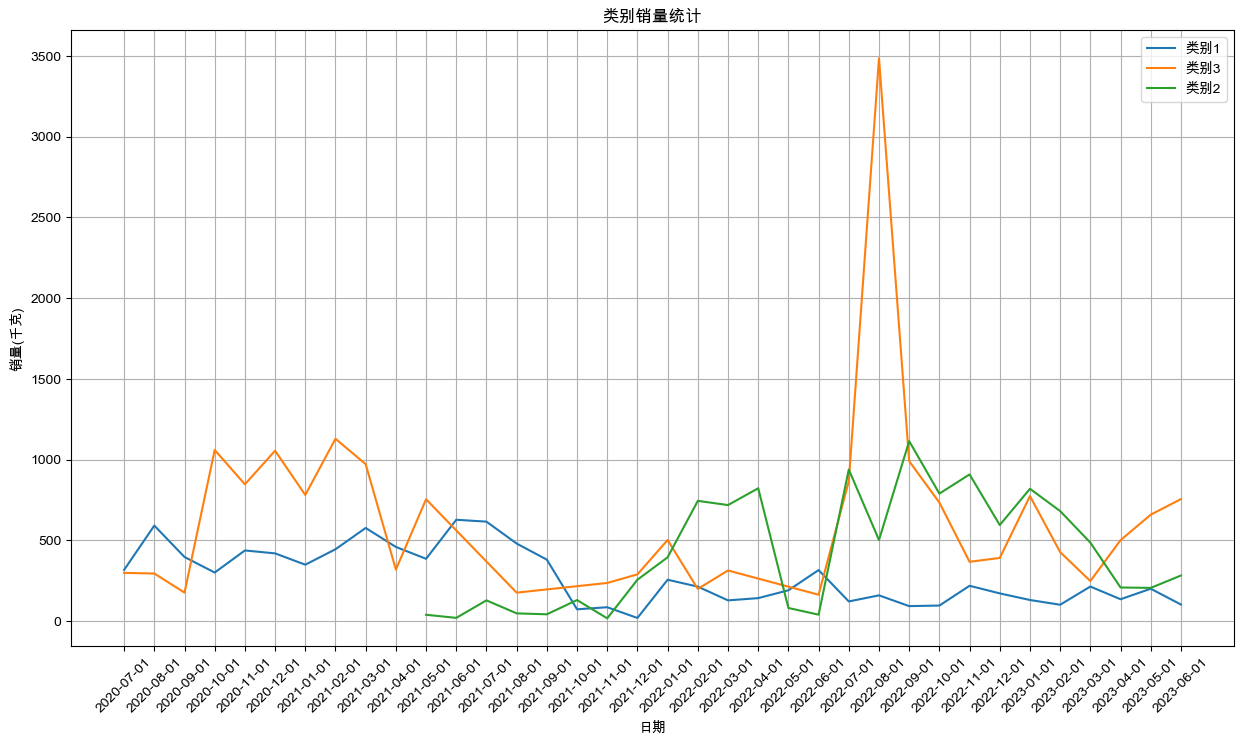

In [35]:
import matplotlib.pyplot as plt

df = cluster

# 创建一个新的图形，并设置图形大小
plt.figure(figsize=(15, 8))  # 这里设置图形大小为宽度10英寸，高度6英寸

# 根据不同的类别绘制折线图
categories = df['聚类种类'].unique()

for category in categories:
    df_category = df[df['聚类种类'] == category]
    plt.plot(df_category['日期'], df_category['销量(千克)'], label=category)

# 设置图表标题和标签
plt.title('类别销量统计')
plt.xlabel('日期')
plt.ylabel('销量(千克)')
plt.grid(True)
# 添加图例
plt.legend()

# 旋转日期标签，以便更好地显示
plt.xticks(rotation=45)

# 显示图表
plt.show()